# Question 6

## Unsharp Masking and Highboost filtering

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

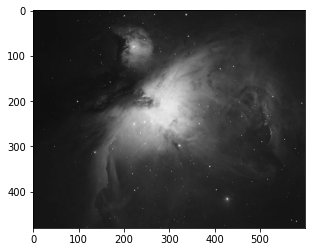

In [2]:
img = cv2.imread("images/orion.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

In [3]:
def filt(img,ker,k):
    r = img.shape[0]
    c = img.shape[1]
    k = ker.shape[0]
    imgP = padding(img,k)
    out = np.zeros_like(imgP)
    padNum = k//2
    xS = padNum
    xE = imgP.shape[0] - padNum
    yS = padNum
    yE = imgP.shape[1] - padNum
    for i in range(xS,xE):
        for j in range(yS,yE):
            KxS = i - padNum
            KxE = i + padNum
            KyS = j - padNum
            KyE = j + padNum
            imgK = imgP[KxS:KxE+1,KyS:KyE+1]
            val = np.sum(np.multiply(imgK,ker))
            out[i,j] = max(0,val)
    out = out[xS:xE,yS:yE]
    return out

In [4]:
def padding(img,k):
    padNum = math.floor(k/2)
    imgP = np.zeros((img.shape[0]+(2*padNum),img.shape[1]+(2*padNum)))
#     print(imgP.shape)
    imgP[padNum:imgP.shape[0]-padNum, padNum:imgP.shape[1]-padNum] = img
    xStart = padNum
    xEnd = imgP.shape[0]-padNum
    yStart = padNum
    yEnd = imgP.shape[1]-padNum
#     print(img.shape)
    imgP[xStart:xEnd, yStart:yEnd] = img
    return imgP

In [5]:
def gausFilter(img,s,k):
#     imgP = padding(img,k)
#     out = np.zeros_like(imgP)
    sS = 2 * (s ** 2)
    kern = np.zeros([k,k])
    center = math.floor(k/2)
    for i in range(k):
        for j in range(k):
            kern[i][j] = math.exp(-1*((i-center)**2 + (j-center)**2)/sS)
    kern = kern/np.sum(kern)
    out = filt(img,kern,k)
    return out.astype('uint8')

In [6]:
def masking(img,k,A):
    s = (k-1)/6
    b = gausFilter(img,s,k)
    out = img + (img-b)*A
    out[out<0] = 0
    return out.astype('int')

### <b>Part 1</b>

#### Unsharp Masking

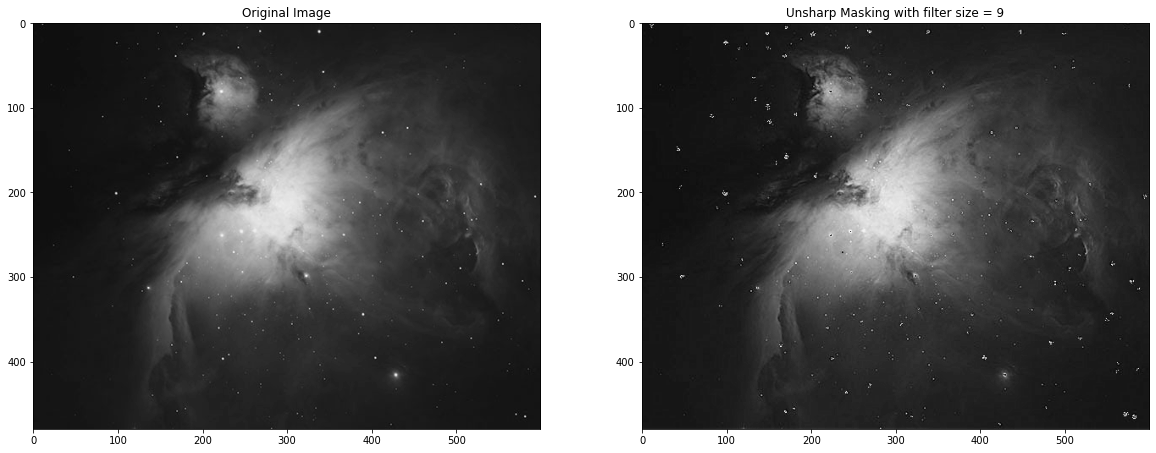

In [7]:
UM = masking(img,9,1)
fig,axs =  plt.subplots(1,2,figsize=(20, 20))
axs[0].imshow(img,cmap='gray')
axs[0].title.set_text('Original Image')
axs[1].imshow(UM,cmap='gray')
axs[1].title.set_text('Unsharp Masking with filter size = 9')

### <b>Part 2</b>

#### Highboost Filtering

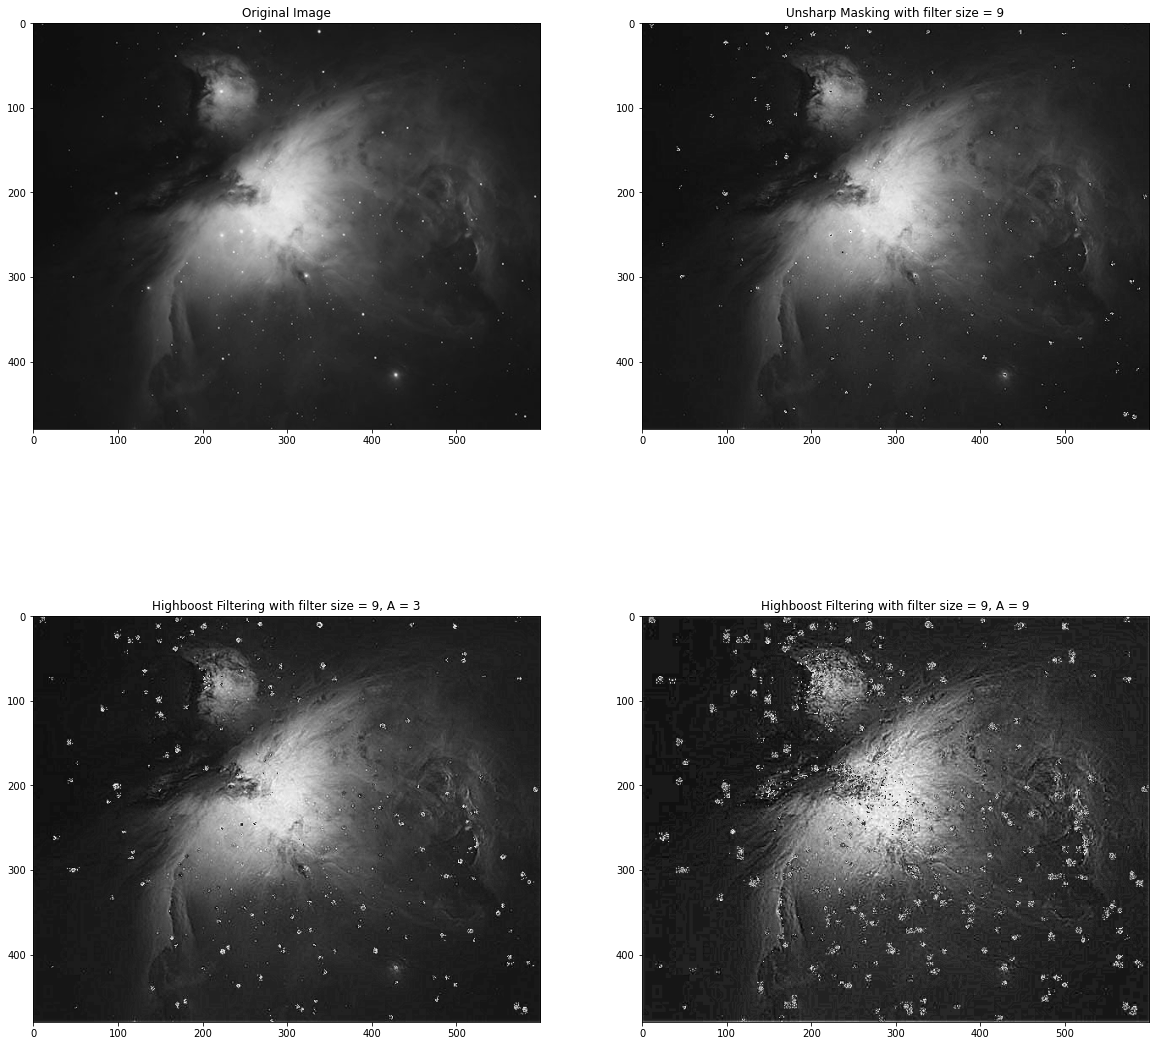

In [8]:
HF1 = masking(img,9,3)
HF2 = masking(img,9,9)
fig,axs =  plt.subplots(2,2,figsize=(20, 20))
axs[0][0].imshow(img,cmap='gray')
axs[0][0].title.set_text('Original Image')
axs[0][1].imshow(UM,cmap='gray')
axs[0][1].title.set_text('Unsharp Masking with filter size = 9')
axs[1][0].imshow(HF1,cmap='gray')
axs[1][0].title.set_text('Highboost Filtering with filter size = 9, A = 3')
axs[1][1].imshow(HF2,cmap='gray')
axs[1][1].title.set_text('Highboost Filtering with filter size = 9, A = 9')

#### <b>Observations</b>
As 'A' increases, there is more noise which arises due to the fact that highboost filtering tries to add weighted detail to images which can go overboard and become undesirable for very high values

### <b>Part 3</b>

In [9]:
f1  = masking(img,3,1)
f2  = masking(img,3,5)
f3  = masking(img,7,1)
f4  = masking(img,7,5)
f5  = masking(img,13,1)
f6  = masking(img,13,5)

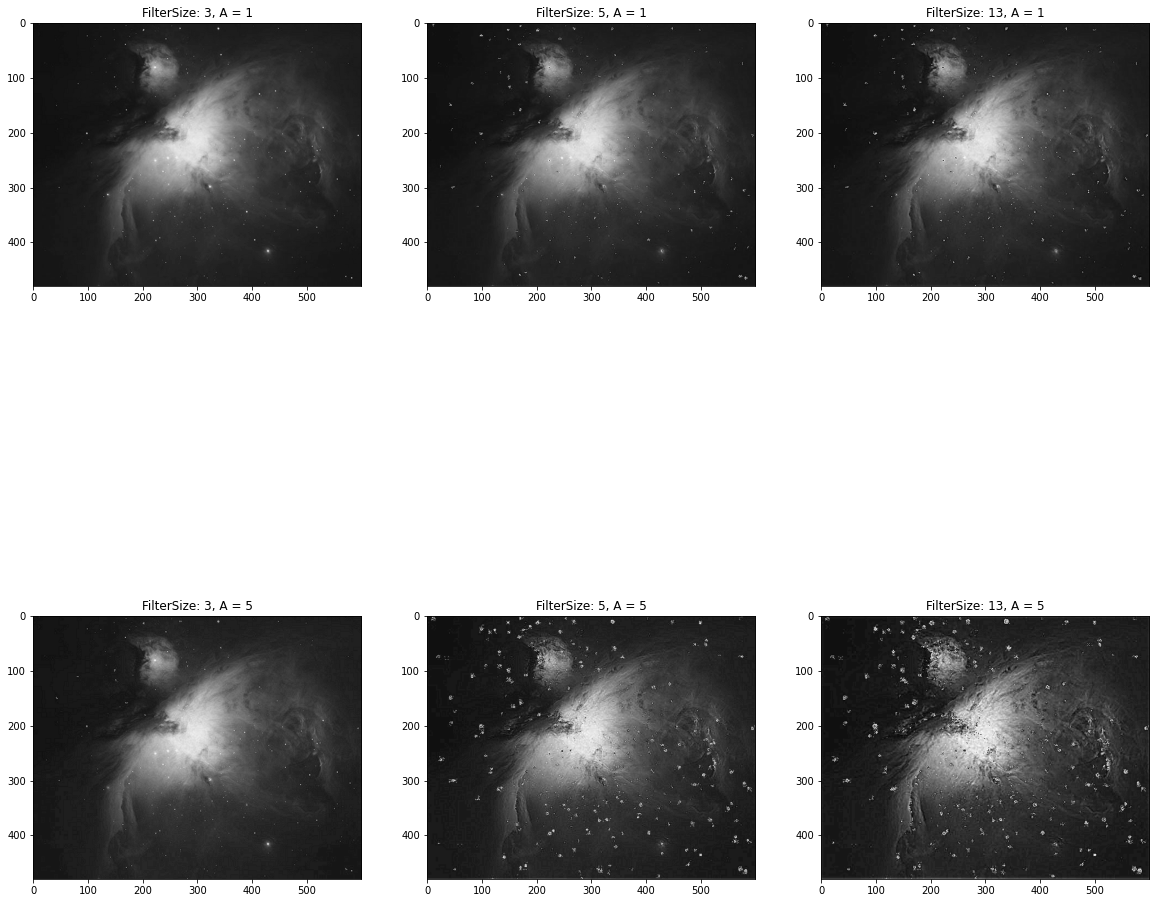

In [10]:
fig,a =  plt.subplots(2,3,figsize=(20, 20))
a[0][0].imshow(f1,cmap='gray')
a[0][0].title.set_text('FilterSize: 3, A = 1')
a[0][1].imshow(f3,cmap='gray')
a[0][1].title.set_text('FilterSize: 5, A = 1')
a[0][2].imshow(f5,cmap='gray')
a[0][2].title.set_text('FilterSize: 13, A = 1')
a[1][0].imshow(f2,cmap='gray')
a[1][0].title.set_text('FilterSize: 3, A = 5')
a[1][1].imshow(f4,cmap='gray')
a[1][1].title.set_text('FilterSize: 5, A = 5')
a[1][2].imshow(f6,cmap='gray')
a[1][2].title.set_text('FilterSize: 13, A = 5')
plt.show()

#### <b>Observations</b>
As 'A' increases, there is more noise which arises due to the fact that highboost filtering tries to add weighted detail to images which can go overboard and become undesirable for very high values.<br>
As filter size increases, the unsharp masking's edges/details become more evident. This is also the case for highboost filtering as the filter size is higher